# Анализ TOP-треков из Spotify

В качестве датасета для анализа был выбран датасет, содержащий TOP-10000 треков в Spotify (https://www.kaggle.com/datasets/leonardopena/top-spotify-songs-from-20102019-by-year)

In [ ]:
# Импорт библиотеки Pandas - для анализа и просмотра данных
import pandas as pd

Датасет находится в формате .csv - текстовом формате табличных данных. Для анализа данных была использована библиотека Pandas. Внутри нее есть большое количество методов для анализа и оценки гипотез, основанных на данных.


### Переменные

* Unnamed: 0 - порядковое число данных; 
* title - название песни;
* artist - имя исполнителя;
* top genre - жанр трека;
* year - год песни в Billboard;
* bpm (Beats.Per.Minute) — темп песни;
* nrgy (Energy) - Энергичность песни. Чем выше значение, тем энергичнее песня;
* dnce (Danceability) - Танцевальность. Чем выше значение, тем легче танцевать под эту песню.
* dB (Loudness) - Громкость. Чем выше значение, тем громче песня.
* live (Liveness) — Чем выше значение, тем больше вероятность того, что песня записана вживую.
* val (Valence) - Валентность. Чем выше значение, тем позитивнее настроение песни.
* dur (Duration) - Продолжительность песни.
* acous (Acousticness) - Акустичность. Чем выше значение, тем акустичнее песня.
* spch (Speechiness) - Количество слов в песни. Чем выше значение, тем больше слов в песне.
* pop (Popularity) - Популярность. Чем выше значение, тем популярнее песня.



In [ ]:
df = pd.read_csv('top10s.csv', encoding = "ISO-8859-1")

# Сделаем датасет более читаемым: переименуем колонки в человеческий вид
df.rename(columns={
    df.columns[0]: "ID",
    'title': 'Title', 'artist' : 'Artist',
    'top genre' : 'Genre', 'year' : 'Year', 
    'bpm' : 'Beats', 'nrgy' : 'Energy', 
    'dnce' : 'Dancebility',
    'dB' : 'Decibel', 'live' : 'Live', 
    'val' : 'Valence', 'dur' : 'Duration',
    'acous' : 'Acousticness', 'spch' : 'Speechiness', 
    'pop' : 'Popularity'
    }, 
    inplace=True
)

# Выведем первые 3 строки, чтобы видеть содержимое .csv файла
df.head(3)

,ID,Title,Artist,Genre,Year,Beats,Energy,Dancebility,Decibel,Live,Valence,Duration,Acousticness,Speechiness,Popularity
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80


# Первичный анализ

Попробуем провести первичный анализ данных: выведем информацию о датасете (`df.info()`, базовые метрики (`df.describe()`)

In [ ]:
# Посмотрим сколько значений в каждом столбце и формат данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            603 non-null    int64 
 1   Title         603 non-null    object
 2   Artist        603 non-null    object
 3   Genre         603 non-null    object
 4   Year          603 non-null    int64 
 5   Beats         603 non-null    int64 
 6   Energy        603 non-null    int64 
 7   Dancebility   603 non-null    int64 
 8   Decibel       603 non-null    int64 
 9   Live          603 non-null    int64 
 10  Valence       603 non-null    int64 
 11  Duration      603 non-null    int64 
 12  Acousticness  603 non-null    int64 
 13  Speechiness   603 non-null    int64 
 14  Popularity    603 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 70.8+ KB


In [ ]:
# Посмотрим статистические характеристики нашего датасета
df.describe()

,ID,Year,Beats,Energy,Dancebility,Decibel,Live,Valence,Duration,Acousticness,Speechiness,Popularity
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,302.000000,2014.592040,118.545605,70.504146,64.379768,-5.578773,17.774461,52.225539,224.674959,14.326700,8.358209,66.520730
std,174.215384,2.607057,24.795358,16.310664,13.378718,2.798020,13.102543,22.513020,34.130059,20.766165,7.483162,14.517746
min,1.000000,2010.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000
25%,151.500000,2013.000000,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000,60.000000
50%,302.000000,2015.000000,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,221.000000,6.000000,5.000000,69.000000
75%,452.500000,2017.000000,129.000000,82.000000,73.000000,-4.000000,24.000000,69.000000,239.500000,17.000000,9.000000,76.000000
max,603.000000,2019.000000,206.000000,98.000000,97.000000,-2.000000,74.000000,98.000000,424.000000,99.000000,48.000000,99.000000


In [ ]:
# Попробуем отсортировать строки относительно года выхода трека

df.sort_values(by='Year')

,ID,Title,Artist,Genre,Year,Beats,Energy,Dancebility,Decibel,Live,Valence,Duration,Acousticness,Speechiness,Popularity
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
28,29,Teenage Dream,Katy Perry,dance pop,2010,120,80,72,-5,13,59,228,2,4,63
29,30,California Gurls,Katy Perry,dance pop,2010,125,75,79,-4,18,40,235,0,5,62
30,31,3,Britney Spears,dance pop,2010,135,71,70,-2,14,79,213,5,5,62
31,32,My First Kiss - feat. Ke$ha,3OH!3,dance pop,2010,138,89,68,-4,36,83,192,1,8,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,575,Someone You Loved,Lewis Capaldi,pop,2019,110,41,50,-6,11,45,182,75,3,96
573,574,Lose You To Love Me,Selena Gomez,dance pop,2019,102,34,51,-9,21,9,206,58,4,97
572,573,Memories,Maroon 5,pop,2019,91,32,76,-7,8,57,189,84,5,99
586,587,Don't Call Me Up,Mabel,dance pop,2019,99,88,67,-3,8,23,178,30,15,86


In [ ]:
# Выведем уникальные значения поля "популярность"
df['Popularity'].unique()

array([83, 82, 80, 79, 78, 77, 76, 73, 72, 71, 70, 69, 68, 66, 65, 64, 63,
       62, 61, 59, 58, 57, 56, 55, 52, 49, 33,  0, 81, 75, 74, 67, 60, 54,
       50, 46, 38, 31, 28, 27, 25,  7, 88, 85, 51, 45, 43, 42, 41, 36, 35,
       86, 44, 37, 30, 84, 47, 39, 34, 18, 53, 48, 29, 87, 99, 97, 96, 95,
       93, 92, 90])

In [ ]:
# Посмотрим, за какие года у нас есть данные и сколько в каждом году есть значений
df['Year'].value_counts()

2015    95
2016    80
2013    71
2017    65
2018    64
2014    58
2011    53
2010    51
2012    35
2019    31
Name: Year, dtype: int64

In [ ]:
# Найдем самые популярные треки за каждый год
short_df = df[['Year', 'Title', 'Popularity']]
short_df[short_df.groupby('Year')['Title'].transform(max) == short_df['Title']]

,Year,Title,Popularity
19,2010,Your Love Is My Drug,69
81,2011,You And I,64
135,2012,You Da One,57
148,2013,Wrecking Ball,77
233,2014,human,68
353,2015,Yesterday (feat. Bebe Rexha),46
374,2016,Work from Home (feat. Ty Dolla $ign),79
490,2017,Younger Now,62
513,2018,no tears left to cry,84
580,2019,Truth Hurts,90


In [ ]:
# Найдем среднюю продолжительность трека за каждый год
df.groupby('Year')['Duration'].mean()

Year
2010    229.803922
2011    242.566038
2012    224.400000
2013    234.492958
2014    224.155172
2015    223.368421
2016    220.225000
2017    222.169231
2018    217.187500
2019    200.645161
Name: Duration, dtype: float64

In [ ]:
# Найдем размах, дисперсию и сраднеквадратичное отклонение продолжительности трека за год 
scope_dur = df['Duration'].max() - df['Duration'].min()
var_dur = df['Duration'].var()
std_dur = df['Duration'].std()
print(scope_dur)
print(var_dur)
print(std_dur)

290
1164.8609499567501
34.13005933128084


In [ ]:
# Найдем медианное значение 'valence' трека за каждый год #вывод
df.groupby('Year')['Valence'].median()

Year
2010    61.0
2011    57.0
2012    68.0
2013    52.0
2014    54.0
2015    52.0
2016    43.0
2017    54.0
2018    47.5
2019    52.0
Name: Valence, dtype: float64

In [ ]:
# Сделаем срез датафрейма по Песня, Год выпуска, Популярность
df_subset = df[['Title', 'Year', 'Duration']]
df_subset.head(5)

,Title,Year,Duration
0,"Hey, Soul Sister",2010,217
1,Love The Way You Lie,2010,263
2,TiK ToK,2010,200
3,Bad Romance,2010,295
4,Just the Way You Are,2010,221


In [ ]:
# Просмотрим 10-14 ряды таблицы
df_subset.iloc[10:15]

,Title,Year,Duration
10,Club Can't Handle Me (feat. David Guetta),2010,235
11,Marry You,2010,230
12,Cooler Than Me - Single Mix,2010,213
13,Telephone,2010,221
14,Like A G6,2010,217


In [ ]:
# Выведем средние значения всего датафрейма
pd.pivot_table(df, columns=['Year'])

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Acousticness,11.627451,13.339623,4.857143,10.323944,17.551724,16.600000,15.8750,16.600000,12.781250,21.741935
Beats,122.058824,119.075472,121.085714,121.676056,123.000000,119.768421,114.3250,116.800000,114.593750,112.451613
Dancebility,64.529412,63.641509,65.714286,62.042254,62.534483,63.663158,63.3250,65.369231,67.203125,69.709677
Decibel,-4.901961,-5.018868,-4.857143,-5.140845,-5.775862,-5.621053,-6.7125,-5.615385,-5.671875,-5.774194
Duration,229.803922,242.566038,224.400000,234.492958,224.155172,223.368421,220.2250,222.169231,217.187500,200.645161
Energy,77.901961,74.886792,75.485714,73.873239,67.775862,70.336842,67.2375,69.169231,65.468750,64.741935
ID,26.000000,78.000000,122.000000,175.000000,239.500000,316.000000,403.5000,476.000000,540.500000,588.000000
Live,21.176471,20.943396,15.828571,19.718310,17.293103,18.305263,17.7375,15.369231,14.750000,15.161290
Popularity,64.254902,61.867925,67.771429,63.985915,62.706897,64.568421,64.1625,69.015385,72.437500,84.354839
Speechiness,8.882353,9.660377,5.800000,8.309859,8.672414,7.052632,8.3625,9.784615,8.625000,8.129032


In [ ]:
# Выведем песни с популярностью больше 80
df[df['Popularity'] > 80]

,ID,Title,Artist,Genre,Year,Beats,Energy,Dancebility,Decibel,Live,Valence,Duration,Acousticness,Speechiness,Popularity
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
51,52,A Thousand Years,Christina Perri,dance pop,2011,139,41,42,-7,11,16,285,31,3,81
139,140,Underneath the Tree,Kelly Clarkson,dance pop,2013,160,81,51,-5,21,69,230,0,5,88
140,141,Wake Me Up,Avicii,big room,2013,124,78,53,-6,16,64,247,0,5,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,591,Takeaway,The Chainsmokers,electropop,2019,100,51,53,-8,10,35,210,13,3,83
591,592,All Around The World (La La La),R3HAB,big room,2019,125,86,73,-5,11,52,148,48,3,82
592,593,Girls Like You (feat. Cardi B),Maroon 5,pop,2019,125,54,85,-7,13,45,236,57,5,81
593,594,Call You Mine,The Chainsmokers,electropop,2019,104,70,59,-6,34,52,218,20,3,81


In [ ]:
# Найдем средний битрейт (beats per minute) трека за каждый год
df.groupby('Year')['Beats'].mean()

Year
2010    122.058824
2011    119.075472
2012    121.085714
2013    121.676056
2014    123.000000
2015    119.768421
2016    114.325000
2017    116.800000
2018    114.593750
2019    112.451613
Name: Beats, dtype: float64

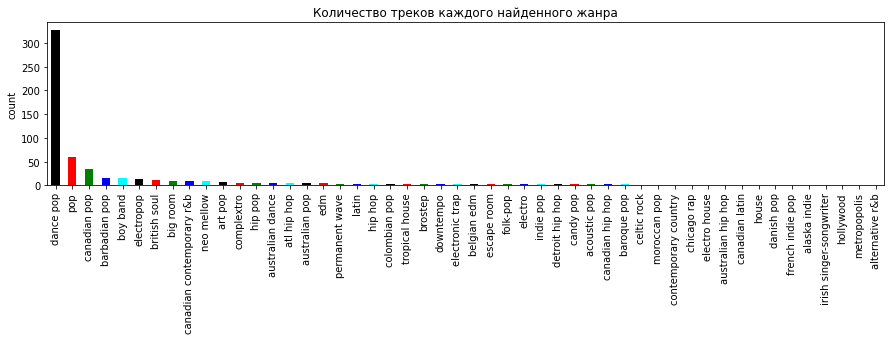

In [ ]:
# Отобразим на bar chart количество треков каждого найденного жанра
plot = df['Genre'].value_counts().plot(
    kind='bar',
    color=['black', 'red', 'green', 'blue', 'cyan'],
    figsize=(15, 3)
)
plot.set_title('Количество треков каждого найденного жанра')
plot.set_ylabel('count')
plot

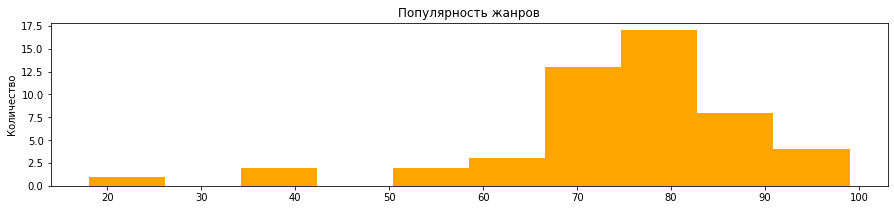

In [ ]:
# Выведем популярность каждого жанра на bar chart
plot = df.groupby('Genre')['Popularity'].max().plot(
    kind='hist',
    figsize=(15, 3),
    color='orange'
)
plot.set_title('Популярность жанров')
plot.set_ylabel('Количество')
plot

## Матрица корреляций

Для начала проведем анализ через матрицу корреляций. На пересечении в сетке матрицы выводится коэффициент корреляции между двумя полями. Простыми словами, число на пересечении сетки говорит о том, насколько сильно (0 - нет зависимости, 1 - полное соответствин двух полей) зависит одна колонка от другой.

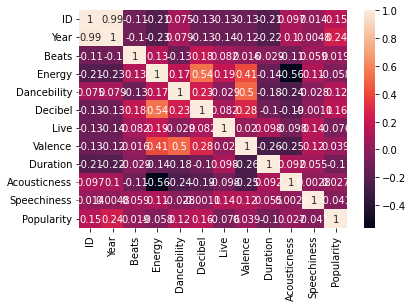

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

# Формируем матрицу корреляций
correlation_matrix = df.corr()

# Выводим матрицу корреляций в виде heatmap для более явной визуализации
sn.heatmap(correlation_matrix, annot=True)
plt.show()

Матрица корреляций показывает наибольшую зависимость между фичами:
- Decibel & Energy (0.54)
- Valence & Energy (0.41)
- Dancebility & Valence (0.5)

Попробуем построить графики:

Text(0, 0.5, 'Energy value')

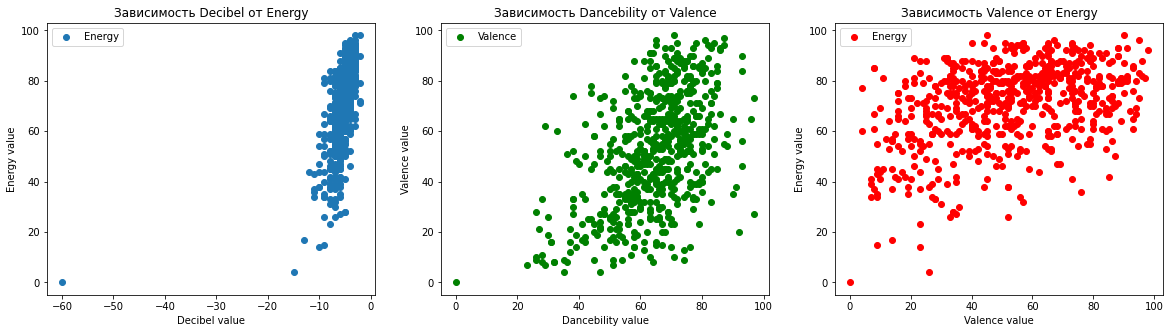

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

# Построим график Decibel от Energy
decibel_energy_plot = df.plot(
    x='Decibel', y='Energy', 
    style='o', ax=axes[0]
)
decibel_energy_plot.set_title('Зависимость Decibel от Energy')
decibel_energy_plot.set_xlabel('Decibel value')
decibel_energy_plot.set_ylabel('Energy value')

# Построим график Dancebility от Valence 
dancebility_valence_plot = df.plot(
    x='Dancebility', y='Valence',
    color='green', style='o', 
    ax=axes[1]
)
dancebility_valence_plot.set_title('Зависимость Dancebility от Valence')
dancebility_valence_plot.set_xlabel('Dancebility value')
dancebility_valence_plot.set_ylabel('Valence value')

# Построим график Valence & Energy
valence_energy_plot = df.plot(
    x='Valence', y='Energy',
    color='red', style='o', 
    ax=axes[2]
)
valence_energy_plot.set_title('Зависимость Valence от Energy')
valence_energy_plot.set_xlabel('Valence value')
valence_energy_plot.set_ylabel('Energy value')


# Z-величина

Попробуем провести анализ поля `dnce` через оценку z-score. Z-score показывает разброс относительно среднего значения и используется для отброса локальных экстремумов из статистики.


In [ ]:
# Формируем список колонок для анализа
stats_columns = ['ID', 'Dancebility']

# Сохраняем фрагмент таблицы в переменную df_shortened
df_shortened = df[stats_columns]
df_shortened.head()

,ID,Dancebility
0,1,67
1,2,75
2,3,76
3,4,70
4,5,64


In [ ]:
# Делаем расчет z-score

from scipy.stats import zscore
df_zscore = df_shortened.apply(zscore)

# Сортируем значения по возрастанию
df_zscore = df_zscore.sort_values('Dancebility')
df_zscore['id'] = range(1, len(df_zscore) + 1)

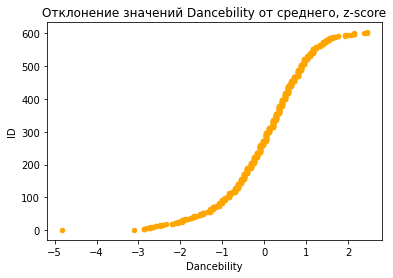

In [ ]:
# Строим график
plot = df_zscore.plot('Dancebility', 'id', kind='scatter', color='orange')
plot.set_title('Отклонение значений Dancebility от среднего, z-score')
plot.set_xlabel('Dancebility')
plot.set_ylabel('ID')
plot

График четко дает понять, что слева от среднего значения находится гораздо больше значений, чем справа. Для анализа это означает, что часть значений меньше среднего (слева) можно отбросить для анализа распределения по правилам нормального распределения.

# Изменение данных со временем

Попробуем посмотреть на графике, как меняется зависимость полей `bpm` от `nrgy` со временем (по году). 

In [ ]:
import plotly.express as px

px.scatter(
    df, 
    x="Beats", y="Energy", 
    size="Popularity", color="Title", 
    hover_name="Artist", log_x=True, 
    animation_frame="Year", size_max=55, 
    range_y=[0, 120],
    title="Зависимость Beats от Energy"
)

Демонстрация отображает, что с течением времени количество BPM в музыке становится более близким к значению 120 BPM. 
В 2010 были распространены треки как с более низким BPM, так и с более высоким, но с течением времени выражается тенденция к смещению BPM в область 100-140 BPM.

При этом, параметр `nrgy` практически не меняется, поскольку вертикально точки практически не смещаются и не меняют свое распределение.

Выведем график распределения песен по годам в виде pie chart, проверим сбалансированность датасета (в каждом году собердится примерно одинаковое количество песен)

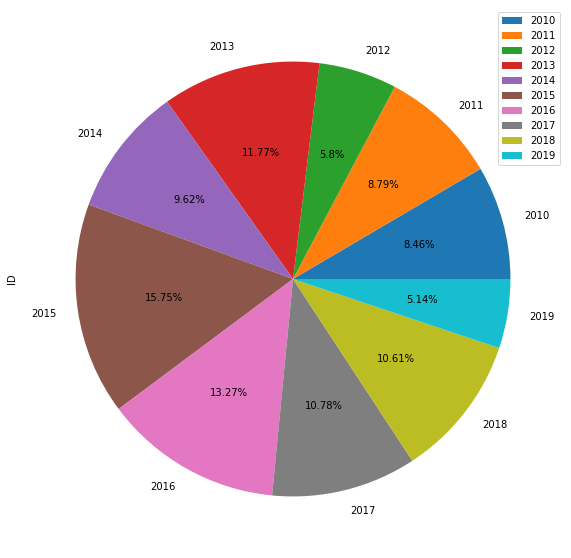

In [ ]:
year_df_count = df.groupby(['Year']).count()

year_df_count.plot(
    kind='pie', y='ID', figsize=(10, 10), 
    autopct=lambda pct: f'{round(pct, 2)}%'
)

In [ ]:
def calculate_year_stats(year, field):
  print(f"Year {year}:")
  print(f"Min: {df[df['Year'] == year][field].min()}")
  print(f"Mean: {df[df['Year'] == year][field].mean()}")
  print(f"Max: {df[df['Year'] == year][field].max()}")
  print()

for year in range(2010, 2019):
  calculate_year_stats(year, 'Beats')

Year 2010:
Min: 43
Mean: 122.05882352941177
Max: 186

Year 2011:
Min: 63
Mean: 119.0754716981132
Max: 175

Year 2012:
Min: 77
Mean: 121.08571428571429
Max: 184

Year 2013:
Min: 77
Mean: 121.67605633802818
Max: 201

Year 2014:
Min: 75
Mean: 123.0
Max: 192

Year 2015:
Min: 77
Mean: 119.76842105263158
Max: 206

Year 2016:
Min: 0
Mean: 114.325
Max: 186

Year 2017:
Min: 73
Mean: 116.8
Max: 192

Year 2018:
Min: 77
Mean: 114.59375
Max: 180



Наша гипотеза оправдывается: после 2011 года BPM держится в значении 75-180 единиц.

In [ ]:
# Добавим тип периода: до 2012 - 0, 2012 и далее - 1. Это поможет нам в расчетах

df['Period type'] = df['Year'].apply(lambda x: 0 if x < 2012 else 1)
df

,ID,Title,Artist,Genre,Year,Beats,Energy,Dancebility,Decibel,Live,Valence,Duration,Acousticness,Speechiness,Popularity,Period type
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83,0
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82,0
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80,0
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79,0
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75,1
599,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75,1
600,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70,1
601,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69,1


In [ ]:
import numpy as np

# Метод для вычисления доверительного интервала
def get_confidence_interval(data):
  return np.percentile(data, 2.5), np.percentile(data, 97.5)

Text(0, 0.5, 'Beats')

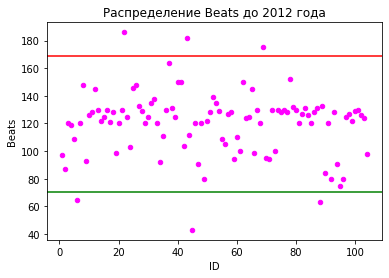

In [ ]:
df_period_before = df[df['Period type'] == 0]

plot = df_period_before.plot(
    'ID', 'Beats', 
    kind='scatter', 
    color='magenta'
)

# Найдем доверительный интервал
confidence_interval = get_confidence_interval(df_period_before['Beats'])

# Выведем границы интервала
plot.axhline(y=confidence_interval[0], color='green', linestyle='-')
plot.axhline(y=confidence_interval[1], color='red', linestyle='-')

# Зададим подписи
plot.set_title('Распределение Beats до 2012 года')
plot.set_xlabel('ID')
plot.set_ylabel('Beats')

Text(0, 0.5, 'Beats')

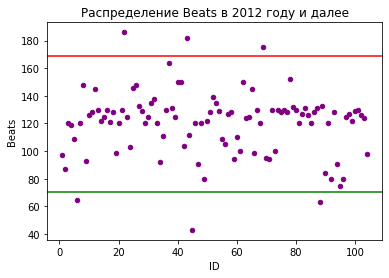

In [ ]:
df_period_after = df[df['Period type'] == 0]

plot = df_period_after.plot(
    'ID', 'Beats', 
    kind='scatter', 
    color='purple'
)
# Найдем доверительный интервал
confidence_interval = get_confidence_interval(df_period_after['Beats'])

# Выведем границы интервала
plot.axhline(y=confidence_interval[0], color='green', linestyle='-')
plot.axhline(y=confidence_interval[1], color='red', linestyle='-')

# Зададим подписи
plot.set_title('Распределение Beats в 2012 году и далее')
plot.set_xlabel('ID')
plot.set_ylabel('Beats')

График за 2010-2011 года отображает большой разброс от среднего значения, при этом график за 2012-2019 года показывает меньший разброс от среднего. Попробуем изменить z-score за 2 периода:


In [ ]:
df_bpm = df[['Period type', 'Beats']]

def get_zscore_stats(frame):
  df_bpm_zscore = frame.apply(zscore)['Beats']

  mean = df_bpm_zscore.mean()

  print(abs(mean - df_bpm_zscore.min()))
  print(abs(mean - df_bpm_zscore.max()))
  print()

get_zscore_stats(df_bpm[df_bpm['Period type'] == 0][df_bpm['Beats'] > 50])
get_zscore_stats(df_bpm[df_bpm['Period type'] == 1][df_bpm['Beats'] > 50])

2.672504456138155
2.9667292138842103

1.846683094330989
3.5670825883990043



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

